# Comprehensive Predictive Modeling of Ames House Prices

1. Introduction (200 words)
•	Overview of Real Estate Price Prediction (100 words): Discuss the significance of predicting real estate prices, its impact on industries like marketing, business intelligence, and urban planning.
•	Scope and Objectives (50 words): Outline the aims of the research, including developing predictive models and evaluating their effectiveness.
•	Structure of the Report (50 words): Briefly describe the structure of the report, summarizing the main sections.


# 2. Exploratory Data Analysis
<br>
<b>2.1 Dataset Description</b>
<br>

•	Description of the Dataset (100 words): Explain the key attributes (e.g., zoning, lot size, building characteristics, neighborhood factors).
•	Source (25 words): Cite the dataset source (e.g., Kaggle, UCI Machine Learning Repository).

<br>
<b>Import libraries</b>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew

%matplotlib inline
sns.set_style('darkgrid')

<b>Load data</b>

In [46]:
dataset = pd.read_csv("house-price-data-apr2024.csv")
dataset.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,24.284752,9981.264932,1.382997,1.112799,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,7.000000,6.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


<br>

<b>2.1 Feature Distributions Relative to target</b>

A comprehensive initial assessment of how each of the 46 features is distributed relative to the target variable ```SalePrice``` is visualized.


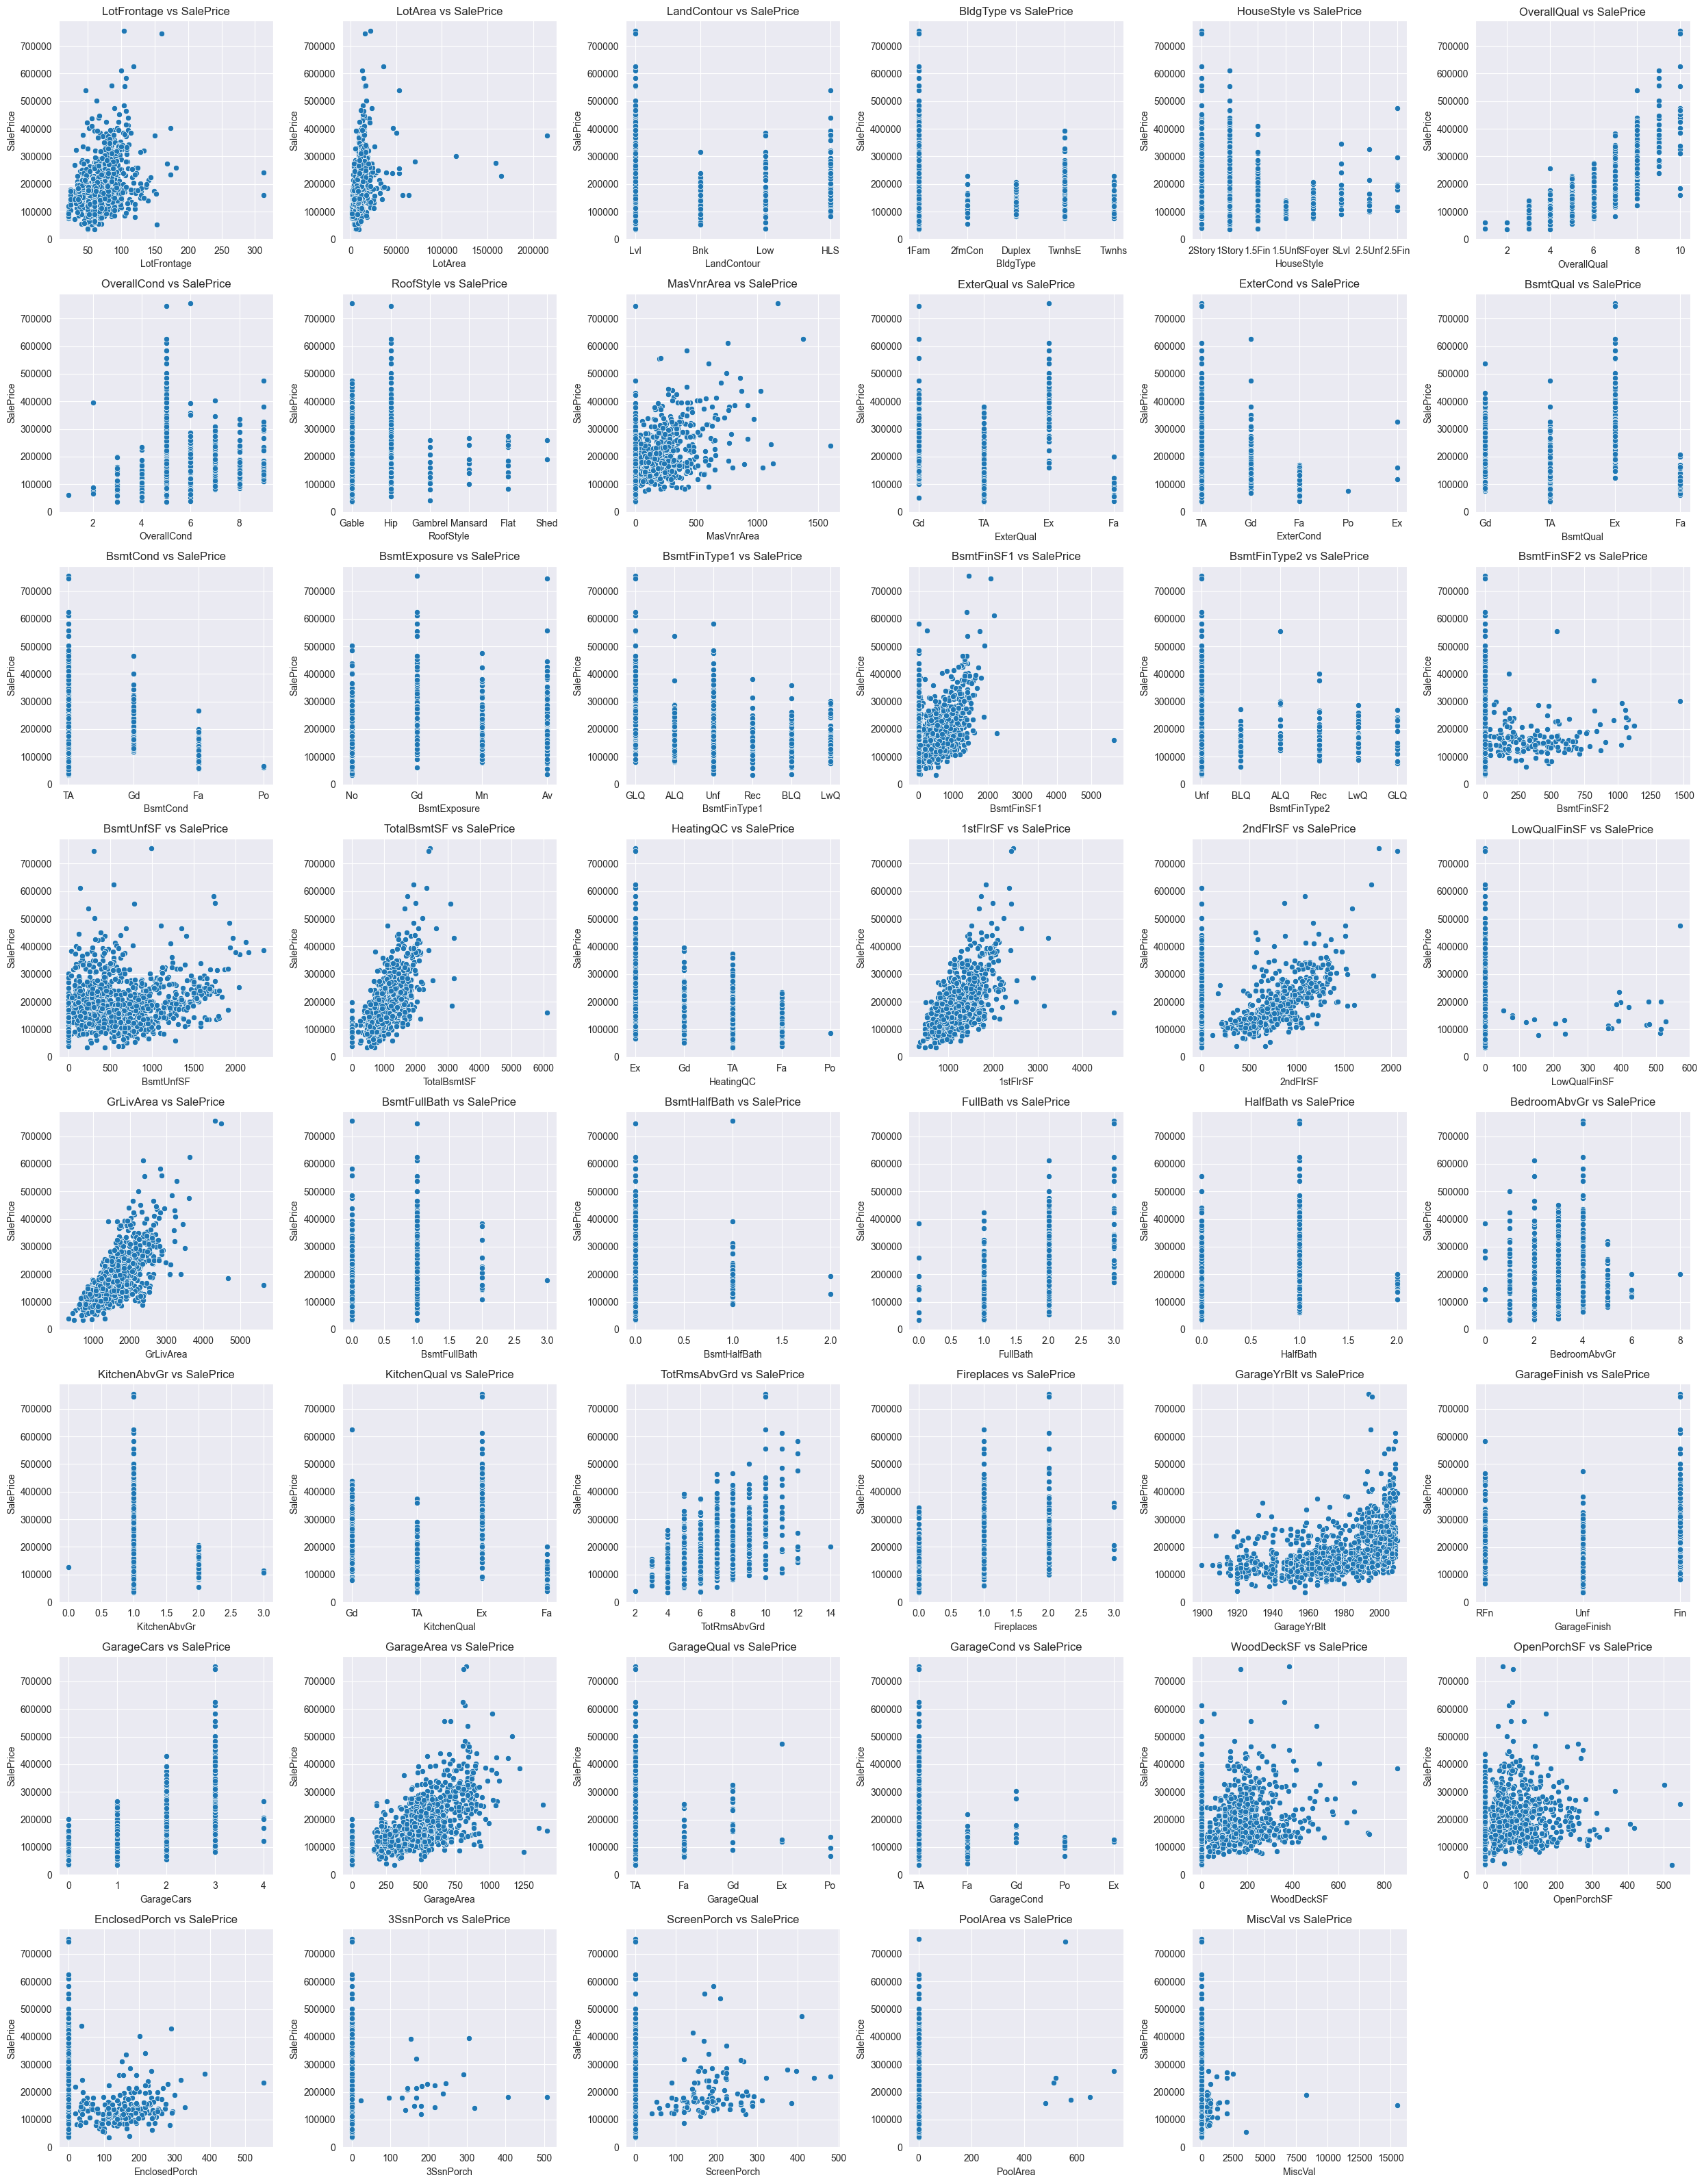

In [47]:

# Assuming 'dataset' is your DataFrame
df = dataset.copy()  # Make a copy to avoid modifying the original dataset

# List of features to visualize
features = df.columns.tolist() 
features.remove('SalePrice') 
target = 'SalePrice'

# Number of rows and columns for subplots
num_rows = 8
num_cols = 6

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 4*num_rows))
axes = axes.flatten() 

# Plot each feature and calculate skewness
for i, feature in enumerate(features):
    # Plotting scatterplot
    sns.scatterplot(x=df[feature], y=df[target], ax=axes[i])
    axes[i].set_title(f'{feature} vs {target}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<br>

<b>2.2 Sale Price</b>

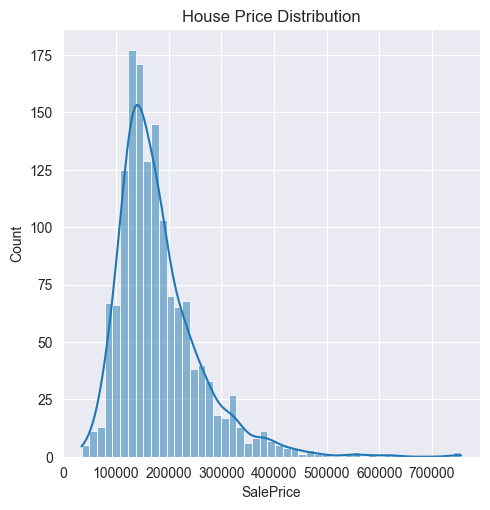

In [48]:
saleprice = dataset["SalePrice"]
sns.displot(saleprice,kde = True)
plt.title("House Price Distribution")
plt.show()


From the plot the distribution of ```SalePrice``` data is apparently right skewed. Its Skewness and Kurtosis statistics are checked.This was expected as few people can afford very expensive houses. 


In [49]:
print(f"""Skewness: {saleprice.skew()}
Kurtosis: {saleprice.kurt()}""")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


<br>

<b>2.3 Numerical Features </b>

There are total 31 numercial features. 

In [50]:
numerical_data = df.select_dtypes(include="number")
numerical_list = numerical_data.columns.tolist()
numerical_list.remove("SalePrice")
print("Number of numerical variables：" , len(numerical_list))

Number of numerical variables： 31


<br>

<b>Correlation coefficient with target variable</b>

To have a first glance of which numeric variables have a high correlation with the ```SalePrice```. The correlation coefficient is computed. All coefficient>0.4 is initially defined as a relative strong linear relationship and visualized. 
However, it is clear that the multicollinearity is an issue. For example: the correlation between ```GarageCars``` and ```GarageArea``` is very high (0.89), while both have relatively high correlations with ```SalePrice```.


<div style="text-align: left;">

| Pearson Correlation Range | Strength of Correlation | Interpretation |
|:---------------------------|:-------------------------|:----------------|
| 0.7 to 1.0 (positive or negative) | Strong | Indicates a strong linear relationship where one variable tends to increase (or decrease) as the other variable increases. |
| 0.5 to 0.7 (positive or negative) | Moderate to Strong | Suggests a meaningful linear relationship between the variables, though not as strong as the highest range. |
| 0.3 to 0.5 (positive or negative) | Weak to Moderate | The relationship exists but is less pronounced and may not be as influential in linear models. |
| 0 to 0.3 (positive or negative) | Weak or No Correlation | Indicates a weak linear relationship or no linear relationship between the variables. |


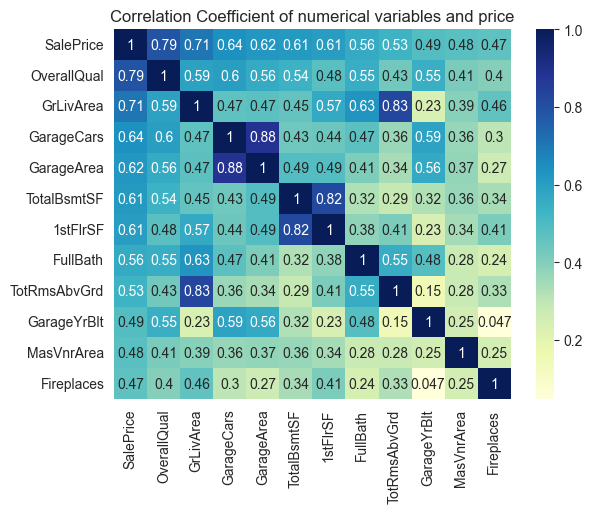

In [51]:
corr = numerical_data.corr()

corr_sorted = corr["SalePrice"].sort_values(ascending=False)
corr_high = corr_sorted[abs(corr_sorted)>0.4].index.tolist()
corr_numVar = corr.loc[corr_high,corr_high]

sns.heatmap(corr_numVar, cmap="YlGnBu", annot=True)
plt.title("Correlation Coefficient of numerical variables and price")
plt.show()

<div align="left">

<b>Skewness</b>

| Skewness Range          | Description                                                                                   |
|:------------------------|:----------------------------------------------------------------------------------------------|
| Near Zero (0)           | Data is symmetric, with skewness between -0.5 and 0.5.                                         |
| Moderate Skewness       | Data is moderately asymmetric, with skewness between -1 to -0.5 or 0.5 to 1.                  |
| High Skewness           | Data is highly skewed, with skewness greater than 1 or less than -1. Transformations needed.   |

</div>

Skewed Features: ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


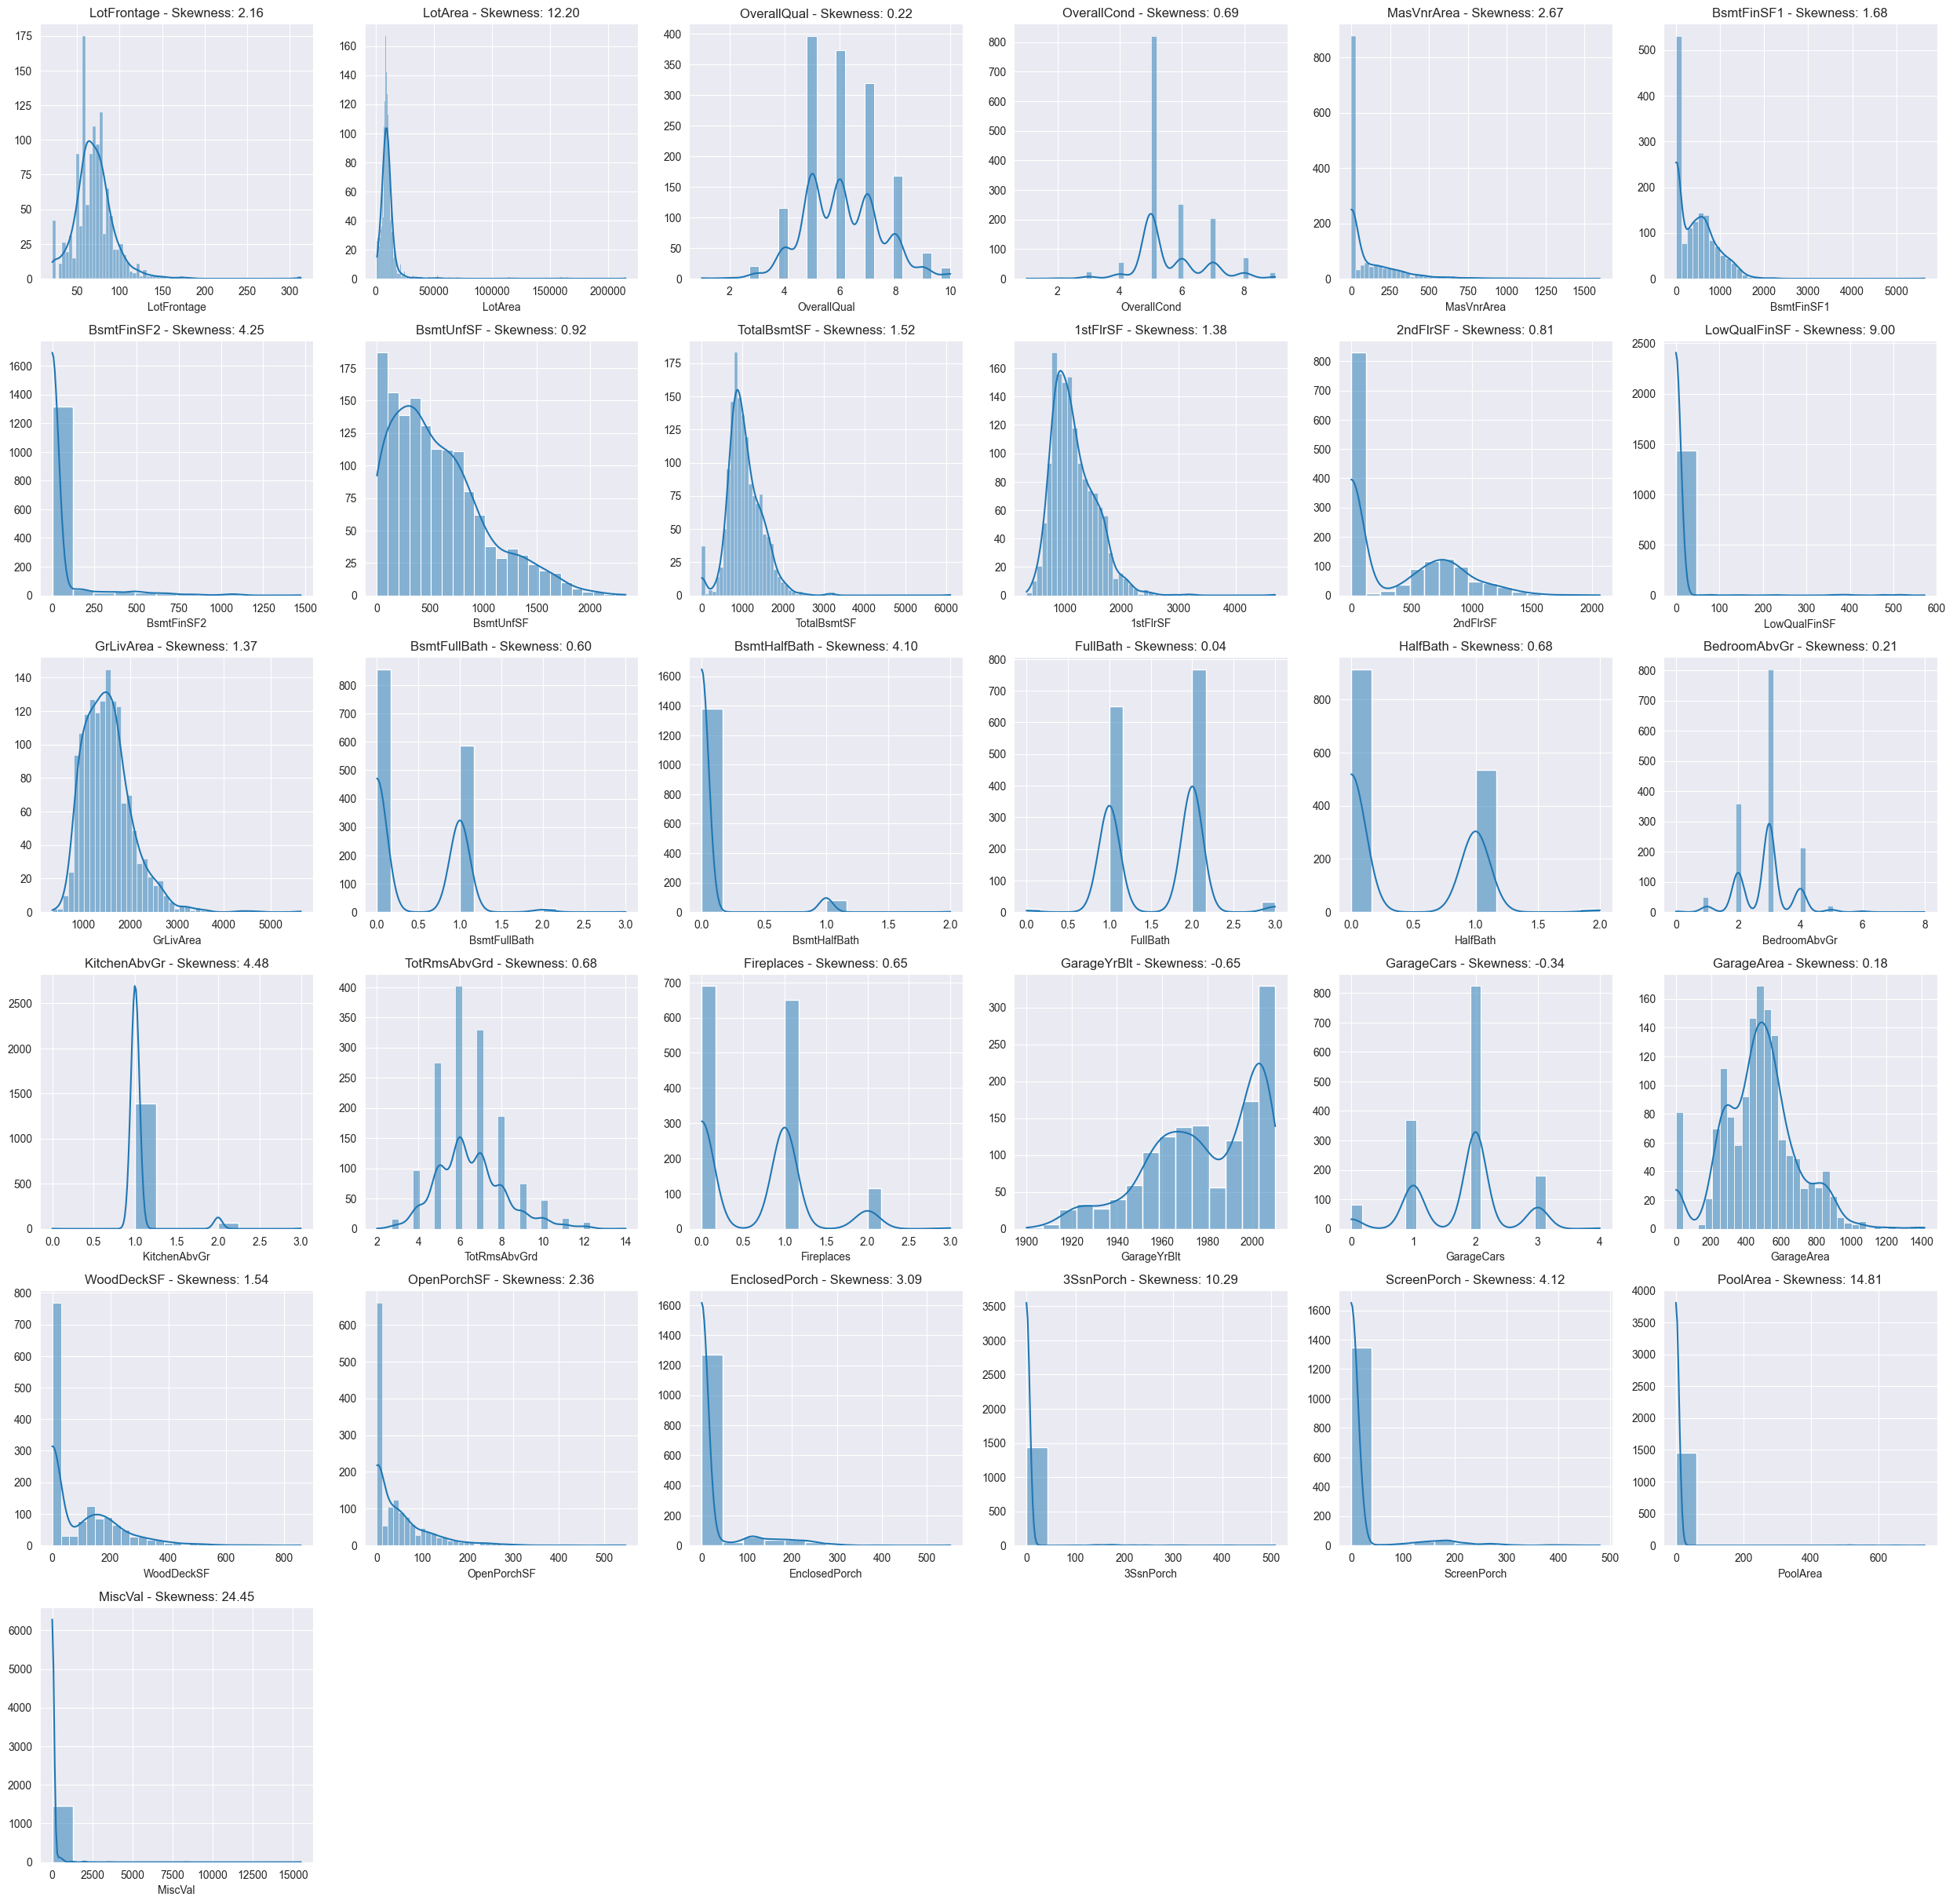

In [52]:
# Make a copy of numerical_data to avoid modifying the original dataset
numerical = numerical_data.drop(columns=["SalePrice"]).copy()
features = numerical.columns.tolist()
skewed_features = []

num_rows = 8
num_cols = 6

# Create subplots for visualization
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 4*num_rows))
axes = axes.flatten()

# Iterate over each feature
for i, feature in enumerate(features):
    # Plot histogram with KDE (Kernel Density Estimate)
    sns.histplot(numerical[feature], kde=True, ax=axes[i])
    
    # Calculate skewness for the current feature
    skewness = skew(numerical[feature].dropna())
    
    # Identify and store features with skewness greater than 1
    if skewness > 1:
        skewed_features.append(feature)
    
    axes[i].set_title(f'{feature} - Skewness: {skewness:.2f}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('')
    
print("Skewed Features:", skewed_features)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<div style="text-align: left;">

<br>

<b>Characteristics summary of numercial variable derived from EDA </b>

<br>

| Numercial Variable       | Characteristics summary derived from EDA                              |
|:----------------|:--------------------------------------------------|
| LotFrontage    | Skewed data, initially had outliers, strong correlation with SalePrice. |
| LotArea        | Skewed data, initially had outliers, moderate correlation with SalePrice. |
| OverallQual    | Strong positive correlation with SalePrice.       |
| OverallCond    | Weak negative correlation with SalePrice.         |
| MasVnrArea     | Skewed data, moderate correlation with SalePrice. |
| BsmtFinSF1     | Skewed data, moderate correlation with SalePrice. |
| BsmtFinSF2     | Skewed data, low correlation with SalePrice.      |
| BsmtUnfSF      | Low correlation with SalePrice.                  |
| TotalBsmtSF    | Skewed data, initially had outliers, strong correlation with SalePrice. |
| 1stFlrSF       | Skewed data, moderate correlation with SalePrice. |
| 2ndFlrSF       | Low correlation with SalePrice.                   |
| LowQualFinSF   | Low correlation with SalePrice.                   |
| GrLivArea      | Skewed data, strong correlation with SalePrice.   |
| BsmtFullBath   | Low correlation with SalePrice.                   |
| BsmtHalfBath   | Skewed data, low correlation with SalePrice.      |
| FullBath       | Moderate correlation with SalePrice.              |
| HalfBath       | Low correlation with SalePrice.                   |
| BedroomAbvGr   | Low correlation with SalePrice.                   |
| KitchenAbvGr   | Skewed data, weak negative correlation with SalePrice. |
| TotRmsAbvGrd   | Moderate correlation with SalePrice.              |
| Fireplaces     | Moderate correlation with SalePrice.              |
| GarageYrBlt    | Low correlation with SalePrice.                   |
| GarageCars     | Moderate correlation with SalePrice.              |
| GarageArea     | Moderate correlation with SalePrice.              |
| WoodDeckSF     | Skewed data, moderate correlation with SalePrice.  |
| OpenPorchSF    | Skewed data, moderate correlation with SalePrice.  |
| EnclosedPorch  | Low correlation with SalePrice.                   |
| 3SsnPorch      | Low correlation with SalePrice.                   |
| ScreenPorch    | Low correlation with SalePrice.                   |
| PoolArea       | Low correlation with SalePrice.                   |
| MiscVal        | Skewed data, initially had outliers, low correlation with SalePrice. |


<br>

<b>2.4 Categorical Features </b>

There are total 16 categorical features. 

In [53]:
categorical_data = df.select_dtypes(exclude="number")
categorical_list = categorical_data.columns.tolist()
print("Number of categorical variables：" , len(categorical_list))

Number of categorical variables： 16


In [54]:
print(categorical_list)

['LandContour', 'BldgType', 'HouseStyle', 'RoofStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageFinish', 'GarageQual', 'GarageCond']




To have an initial feel of categorical variables 's characteristics. The cardinality of categorical variables is visualized. Categorical variables with high cardinality (i.e. ```HouseStyle```, ```RoofSytle```, ```BsmtFinType1```, and ```BsmtFinType2```) may have a significant impact on the analysis or modeling process.


C:\Users\Claire\AppData\Local\Temp\ipykernel_17556\178633078.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=cardinality_df["Variable"],x=cardinality_df["Cardinality"],data=cardinality_df, palette="GnBu_r")


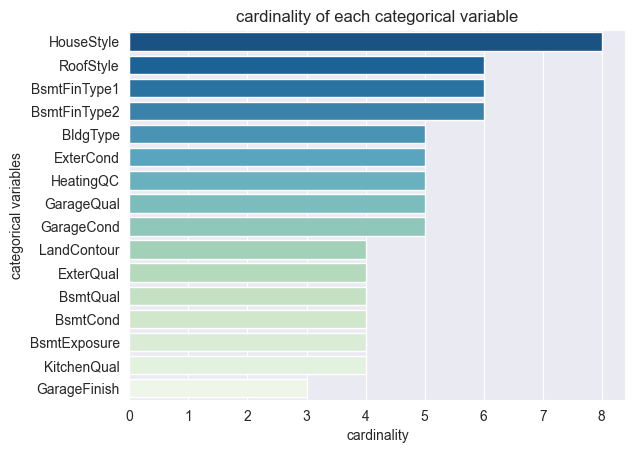

In [55]:
cardinality = {var: df[var].nunique() for var in categorical_list}
cardinality_df = pd.DataFrame(cardinality.items(), columns=["Variable", "Cardinality"])
cardinality_df=cardinality_df.sort_values(by="Cardinality",ascending=False)

sns.barplot(y=cardinality_df["Variable"],x=cardinality_df["Cardinality"],data=cardinality_df, palette="GnBu_r")
plt.ylabel("categorical variables")
plt.xlabel("cardinality")
plt.title("cardinality of each categorical variable")
plt.show()

<br>

# 3. Data Preprocessing

<br>

<b>3.1 Missing Value</b>

For numerical variables, given that the missing percentage for ```LotFrontage``` and ```GarageYrBlt``` is relatively high (17.7% and 5.5% respectively), creating missing value indicators is more suitable compared to other approaches such as mean imputation. Each of these variables are replaced by a new variable that works as a missing value indicator. If the value in the original variable is missing then the corresponding value in the new variable should be 1, otherwise it should be 0. 


31


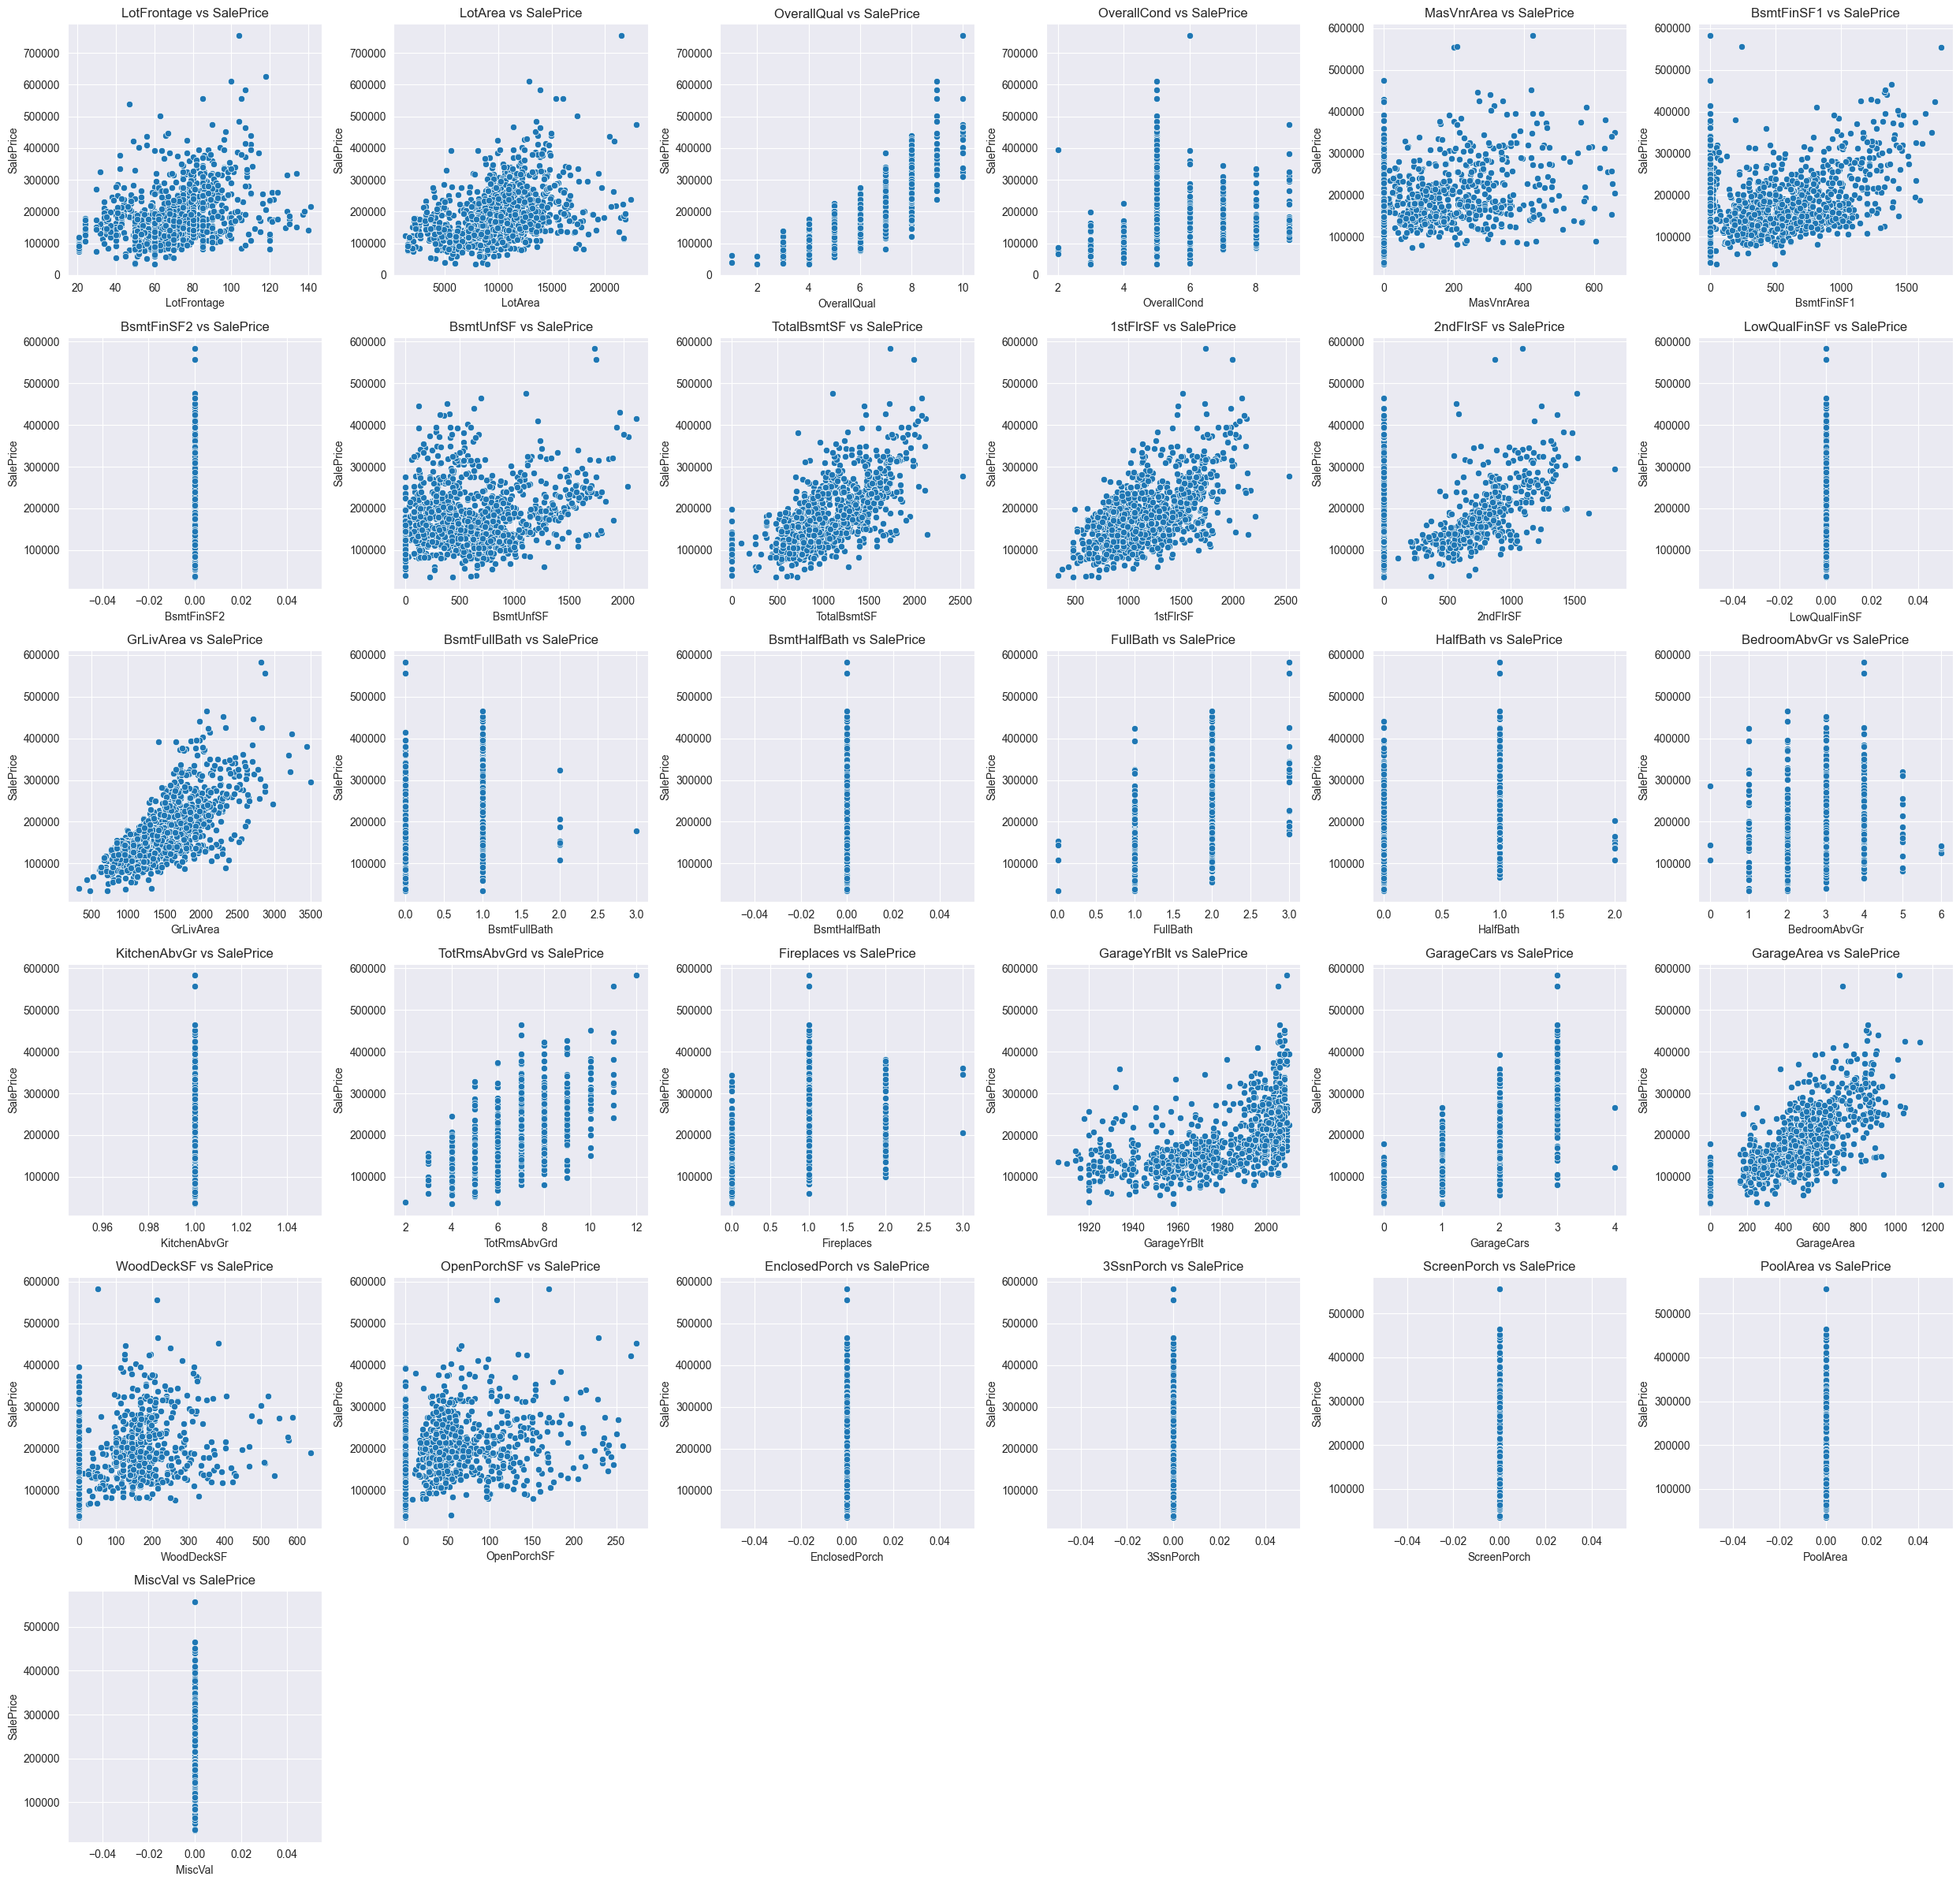

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to process
# Remove outliers and plot
n_cols = 6  # Number of plots per row
n_rows = (len(numerical_list) + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 4 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration
num_outlier=0
for i, column in enumerate(numerical_list):
    if column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR

        # Identify outliers
        outliers = df[(df[column] > upper_bound) | (df[column] < lower_bound)].index
        df.drop(outliers, inplace=True)

        # Plot each column in the subplot
        sns.scatterplot(x=df[column], y=df['SalePrice'], ax=axes[i])
        axes[i].set_title(f'{column} vs SalePrice')
        num_outlier+=1

print(num_outlier)
# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [57]:
numerical_missing = numerical_data.isna().sum().sort_values(ascending=False)
numerical_missing_percent = numerical_missing/len(numerical_data) * 100
numerical_missing_data = pd.DataFrame({ 
                                     "Percent": numerical_missing_percent, 
                                     "Count": numerical_missing})
numerical_missing_data.head(10)

,Percent,Count
LotFrontage,17.739726,259
GarageYrBlt,5.547945,81
MasVnrArea,0.547945,8
BedroomAbvGr,0.000000,0
MiscVal,0.000000,0
PoolArea,0.000000,0
ScreenPorch,0.000000,0
3SsnPorch,0.000000,0
EnclosedPorch,0.000000,0
OpenPorchSF,0.000000,0


In [58]:
vars_with_missing = []
for var in df.select_dtypes(include="number").columns:
   if df[var].isnull().any():
      vars_with_missing.append(var)
for var in vars_with_missing:
   df[var+"_missing"] = df[var].isnull().astype(int)
   df.drop(columns=[var],inplace=True)

sum(df.select_dtypes(include="number").isna().sum())

0

For categorical variables, the proportion of missing values is relatively low (```GarageFinish```, ```GarageQual```, and ```BsmtExposure`` range between 2.5% and 5.5%, this is considered low) and unlikely to skew the data. Mode imputation for categorical variables replaces missing values with the most frequent category.

In [59]:
categorical_missing = categorical_data.isna().sum().sort_values(ascending=False)
categorical_missing_percent = categorical_missing/len(categorical_data) * 100
categorical_missing_data = pd.DataFrame({ 
                                     "Percent": categorical_missing_percent, 
                                     "Count": categorical_missing})
categorical_missing_data.head(10)

,Percent,Count
GarageFinish,5.547945,81
GarageQual,5.547945,81
GarageCond,5.547945,81
BsmtExposure,2.602740,38
BsmtFinType2,2.602740,38
BsmtQual,2.534247,37
BsmtCond,2.534247,37
BsmtFinType1,2.534247,37
LandContour,0.000000,0
BldgType,0.000000,0


In [60]:
for column in categorical_data.columns:   
   mode_value = df[column].mode()[0]
   df[column].fillna(mode_value,inplace=True)
sum(df.select_dtypes(exclude="number").isna().sum())

C:\Users\Claire\AppData\Local\Temp\ipykernel_17556\3307695967.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value,inplace=True)


0

All missing values have been handled!

<br>

<b>3.2 Label Encoding</b>

Many machine learning algorithms require numerical input. Label encoding is necessary to transform these categories into numerical values. All ordinal categorical variables are encoded into   numbers based on the mean value of the target variable (```SalePrice```). The smaller value corresponds to the category that has the smaller mean house sale price. That is. the category that has the smallest mean house sale price can be replaced with 0, the next category with 1, and 
so on. Compared to one-hot encoding, which creates binary columns for each category, this approach reduces the dimensionality of the feature space.


In [61]:
cat_vars = df.select_dtypes(exclude=['number']).columns

for var in cat_vars:
    # Calculate mean sale price for each category in the training set
    mean_sale_price = df.groupby(var)['SalePrice'].mean().sort_values()
    
    # Create a mapping dictionary for encoding
    encoding_map = {category: i for i, category in enumerate(mean_sale_price.index)}
    
    # Apply encoding to both training and testing datasets
    # Define the default value to assign to missing values in the test dataset
    # This value represents the encoding for missing categories that were not present in the training dataset
    df["encoded_" + var] = df[var].map(encoding_map)
    df["encoded_" + var] = df[var].map(encoding_map)
    
    # Drop original categorical variables
    df.drop(columns=[var], inplace=True)


<br>

<b>3.3 Remove outliers</b>

Exploratory data analysis (EDA) has identified outliers in the GrLivArea variable. Since regression models are sensitive to outliers, these outliers need to be removed to improve model accuracy.

In [62]:
# sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'],data=df)
# plt.show()

In [63]:
# outlier=df[df['GrLivArea']>4000].index
# print(outlier)
# df.drop(outlier,inplace=True,axis=0)

<br>

# 4. Feature Engineering

<br>

<b>4.1 Split Data into Training and Testing Sets</b>

<br>

Split the data into training and test sets, with 70% for training and 30% for testing. This step is done after data preprocessing but before transformation and standardization to prevent data leakage.

In [64]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.33, random_state=10)

<br>
<b>4.2 Fixing skewness with Log Transformation</b>

The target variable(```SalePrice```) is right skewed as shown before. Since normal distribution is crucial for linear regression, a log transformation is performed on skewed data to approximate a normal distribution. From distribution plot and QQ plot, the transformed data is approximately normally distributed.

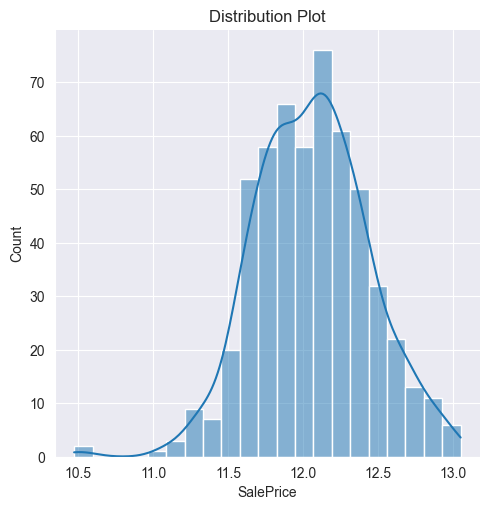

In [65]:
train_df['SalePrice'] = np.log(train_df['SalePrice'])
test_df['SalePrice'] = np.log(test_df['SalePrice'])

sns.displot(train_df["SalePrice"], kde=True)
plt.title("Distribution Plot")
plt.show()

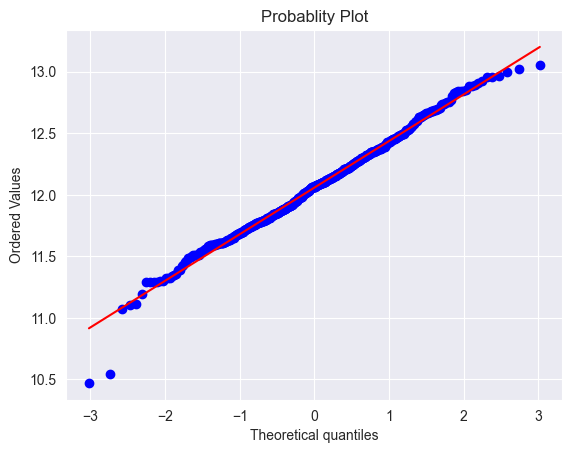

In [66]:
stats.probplot(train_df["SalePrice"], dist="norm", plot=plt)
plt.title("Probablity Plot")
plt.show()

<br>
<b>4.3 Filter and Wrapper</b>

In [67]:
from sklearn.feature_selection import VarianceThreshold

y_train= train_df['SalePrice']
y_test= test_df['SalePrice']

X_train = train_df.drop('SalePrice', axis=1) 
X_test = test_df.drop('SalePrice', axis=1) 

threshold_n=0.95

sel = VarianceThreshold(threshold=threshold_n*(1-threshold_n))
X_train_filtered = sel.fit_transform(X_train)
X_test_filtered = sel.transform(X_test)

mask = X_train.columns[sel.get_support(indices=True)]
X_train_filtered = pd.DataFrame(X_train_filtered,columns=mask)
X_test_filtered = pd.DataFrame(X_test_filtered,columns=mask)

print(mask)

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'LotFrontage_missing', 'encoded_LandContour', 'encoded_BldgType',
       'encoded_HouseStyle', 'encoded_RoofStyle', 'encoded_ExterQual',
       'encoded_ExterCond', 'encoded_BsmtQual', 'encoded_BsmtCond',
       'encoded_BsmtExposure', 'encoded_BsmtFinType1', 'encoded_HeatingQC',
       'encoded_KitchenQual', 'encoded_GarageFinish'],
      dtype='object')


Number of selected features:  29
[ 1  8  5  3  6 15 10 16 26  0  2  4 24  7 32 13 18 30 25 29 17 12 28  9
 31 14 23 11 22 27 21 20 19]


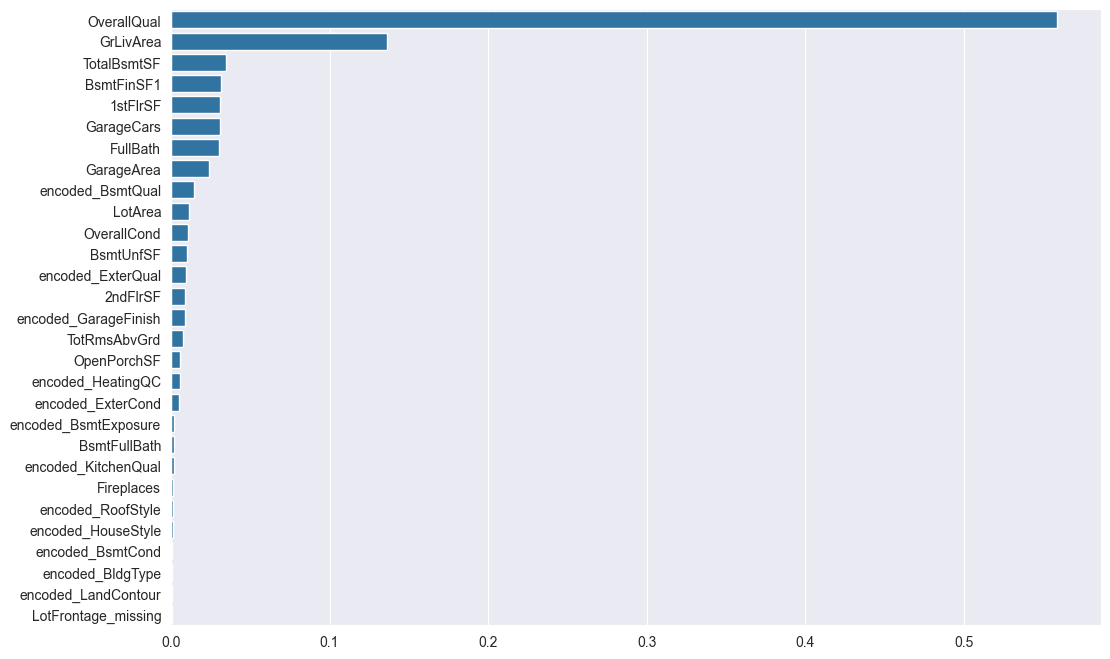

In [68]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=7)
wrap = model.fit(X_train_filtered, y_train)
importances=model.feature_importances_
indices = np.argsort(importances)[::-1]

threshold_r = 0.001
filtered_importance = np.where(importances>threshold_r)[0]
sorted_indices = indices[filtered_importance]

selected_feature = X_train_filtered.columns[sorted_indices]

print("Number of selected features: ",len(sorted_indices))
print(indices)

plt.figure(figsize=(12,8))
sns.barplot(x=importances[sorted_indices],y=np.array(X_train_filtered.columns)[sorted_indices])
plt.show()


In [69]:
from sklearn.feature_selection import RFE

model_rfe = RandomForestRegressor(random_state=7)

rfe = RFE(estimator=model_rfe, n_features_to_select=len(sorted_indices))
fit = rfe.fit(X_train_filtered, y_train)

X_train_wrapper = pd.DataFrame(fit.transform(X_train_filtered),columns=selected_feature)
X_test_wrapper = pd.DataFrame(fit.transform(X_test_filtered),columns=selected_feature)

<br>
<b>4.3 Standardization and transformation</b>

Standardization (or z-score normalization) is necessary to ensure all variables have the same scale for comparisons. It transforms the data to have a mean of 0 and a standard deviation of 1. 
$$ x'_i = \frac{x_i - \mu}{\sigma} $$


In [70]:
from sklearn.preprocessing import StandardScaler

# Standardize the features to have mean=0 and variance=1
# StandardScaler can help mitigate overflow issues by scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_wrapper)
X_test_scaled = scaler.transform(X_test_wrapper)


<br>
To mitigate skewness observed during EDA, Yeo-Johnson transformation is implemented to address skewed data distributions by applying a power transformation after z-score normalization. This method adjusts the data distribution to approximate normality, thereby improving the suitability of the data for robust and accurate predictions.




\begin{cases} 
\frac{(y + 1)^{\lambda} - 1}{\lambda} & \text{if } y \geq 0, \lambda \neq 0 \\
\ln(y + 1) & \text{if } y \geq 0, \lambda = 0 \\
\frac{-(|y| + 1)^{2 - \lambda} - 1}{2 - \lambda} & \text{if } y < 0, \lambda \neq 2 \\
-\ln(|y| + 1) & \text{if } y < 0, \lambda = 2
\end{cases}

<br>



In [71]:
from sklearn.preprocessing import PowerTransformer

# Apply the Yeo-Johnson transformation to the standardized features
# PowerTransformer with 'yeo-johnson' method handles non-positive data, but overflow may still occur
pt = PowerTransformer(method='yeo-johnson')
X_train_transformed = pt.fit_transform(X_train_wrapper)
X_test_transformed = pt.transform(X_test_wrapper)

# Convert transformed arrays back to DataFrame
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=X_train_wrapper.columns)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=X_test_wrapper.columns)


In [72]:
mean_before = X_train_wrapper.mean()
std_before = X_train_wrapper.std()

mean_after = X_train_transformed_df.mean()
std_after = X_train_transformed_df.std()

summary_df = pd.DataFrame(
    {'Feature': X_train_wrapper.columns,
    'Mean Before': mean_before.values,
    'Std Before': std_before.values,
    'Mean After standardalization and transformation': mean_after,
    'Std After standardalization and transformation': std_after}
)

summary_df.head(10)

,Feature,Mean Before,Std Before,Mean After standardalization and transformation,Std After standardalization and transformation
OverallQual,OverallQual,9156.076782,3459.036167,4.562672e-16,1.000915
GrLivArea,GrLivArea,6.279707,1.388206,-5.066027e-16,1.000915
TotalBsmtSF,TotalBsmtSF,5.424132,0.943069,-1.538481e-15,1.000915
BsmtFinSF1,BsmtFinSF1,441.491773,428.324978,5.683043e-17,1.000915
1stFlrSF,1stFlrSF,620.199269,450.516723,1.915997e-16,1.000915
GarageCars,GarageCars,1061.691042,379.499899,-1.818574e-16,1.000915
FullBath,FullBath,1131.217550,341.483569,-3.283175e-15,1.000915
GarageArea,GarageArea,342.268739,430.628414,1.201558e-16,1.000915
encoded_BsmtQual,encoded_BsmtQual,1473.486289,458.774567,2.549251e-16,1.000915
LotArea,LotArea,0.424132,0.509258,-1.948472e-17,1.000915


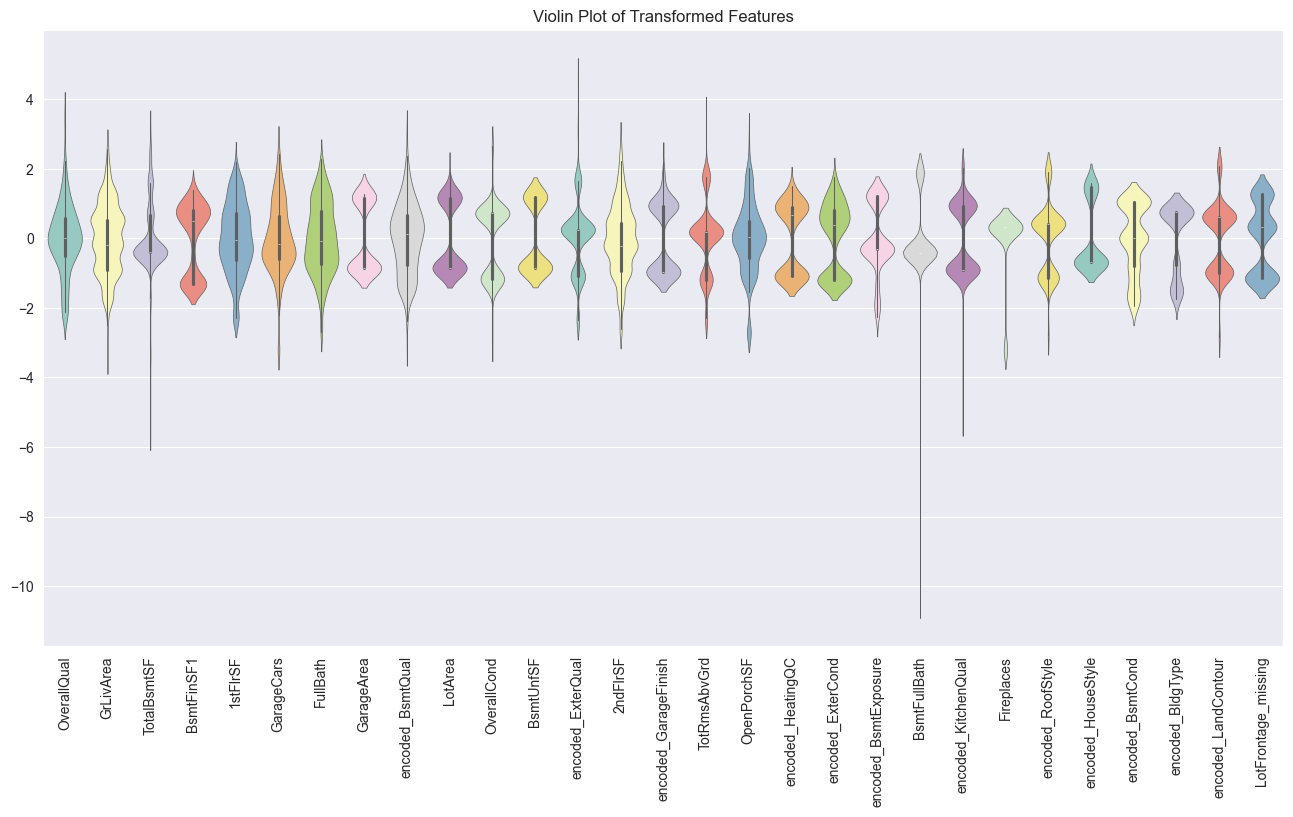

In [73]:
plt.figure(figsize=(16, 8))
sns.violinplot(data=X_train_transformed_df, palette='Set3',orient='v', linewidth=0.5)
plt.title('Violin Plot of Transformed Features')
plt.xticks(rotation=90)
plt.show()

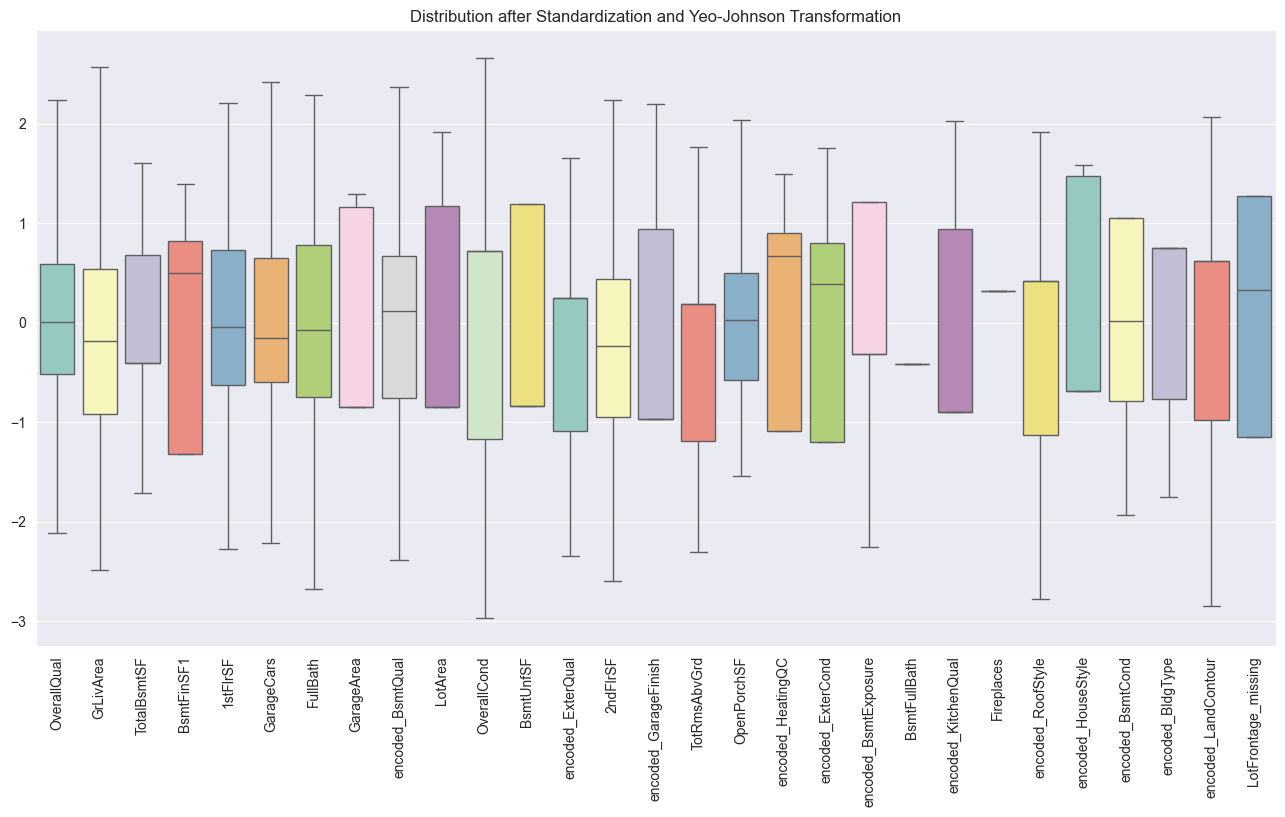

In [74]:
# Box plot comparing original, standardized, and transformed distributions
plt.figure(figsize=(16, 8))
sns.boxplot(data=X_train_transformed_df, orient="v", palette='Set3', showfliers=False)
plt.title('Distribution after Standardization and Yeo-Johnson Transformation')
plt.xticks(rotation = 90)
plt.show()


Apparently from the boxplot some featuress including```ScreenPorch```, ```LotFrontage```have low variance, indicating these features do not provide siginicant information and can be filtered.

In [75]:
y_train

732     12.312682
540     12.660328
221     12.206073
47      12.428015
1074    12.175613
          ...    
670     12.063933
572     12.321631
966     11.982929
236     12.130810
469     12.138864
Name: SalePrice, Length: 547, dtype: float64

<br>

# 5. Modeling

<br>

<b>5.1 KFold and Cross-validation</b>

<br>

In machine learning, evaluating the performance of a model is crucial to ensure its effectiveness on unseen data. Cross-validation is a technique used to achieve this by splitting the data into multiple subsets, training the model on some subsets, and evaluating it on others.

In [76]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve

num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)


<br>

<b>5.2 Evaluate Function</b>

<br>

To streamline the evaluation process for multiple models, a evaluate function is defined. ```Cross-validation``` is used to evaluate a model's performance more reliably. It involves splitting the data into several folds or subsets. The model is trained on some folds and tested on the remaining ones. This process is repeated multiple times, ensuring that every fold gets a chance to be the test set. The scores from each iteration are then averaged to give a more accurate measure of model performance. ```Cross-validation``` helps detect overfitting and ensures the model's ability to generalize to new data. 

```R-squared``` measures how well the model explains the variability of ```SalePrice```. ```Mean Squared Error (MSE)``` indicates the average squared difference between predicted and actual prices. Lower MSE means better accuracy. ```Residuals```, the differences between actual and predicted prices, show prediction errors. Plotting residuals helps identify patterns, ensuring errors are randomly distributed, which indicates a good model fit.

R2 Square Formula:

\begin{equation}
R^2 = 1 - \frac{\sum_{i=1}^{N} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{N} (y_i - \bar{y})^2}
\end{equation}

MSE Formula:

\begin{equation}
\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
\end{equation}

Residual Formula:

\begin{equation}
\text{Residuals} = y_i - \hat{y}_i \quad \text{for each } i = 1, 2, \ldots, n
\end{equation}



In [77]:
def evaluate_model(model, X_train_transformed_df, y_train, X_test_transformed_df, y_test):
    model.fit(X_train_transformed_df,y_train)

    scores = cross_val_score(model,X_train_transformed_df,y_train,cv=kfold,scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print("RMSE Scores for each fold:", rmse_scores)

    y_predict = model.predict(X_test_transformed_df)
    mse = mean_squared_error(y_test, y_predict)
    r_squared = r2_score(y_test,y_predict)
    print("R-squared:", r_squared)
    print("Mean Squared Error:", mse)

    y_test_rescaled = np.exp(y_test)
    y_pred_rescaled = np.exp(y_predict)
    residuals = y_test_rescaled - y_pred_rescaled

    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, bins=20)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title('Histogram of Residuals')
    plt.show()

        # Learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train_transformed_df, y_train, cv=kfold, scoring='r2', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("R-squared")
    plt.title("Learning Curve")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


<br>

<b>5.3 Candidate models</b>

<br>

<b>5.3.1 LinearRegression</b>

<br>

```LinearRegression``` is a statistical model which estimates the linear relationship between a scalar response and one or more explanatory variablesis. It used for predicting house prices because it fits a linear relationship between features (like area, rooms) and price. Here, it calculates coefficients and intercept to make predictions on transformed training and test datasets, evaluating its performance.

\begin{equation}
\hat{\beta} = (X^T X)^{-1} X^T y
\end{equation}




RMSE Scores for each fold: [0.07457227 0.1516542  0.1133883  0.1236004  0.09468939 0.12044598
 0.09919896 0.12743358 0.14493362 0.14706276]
R-squared: 0.9093385200191713
Mean Squared Error: 0.014867899100145647


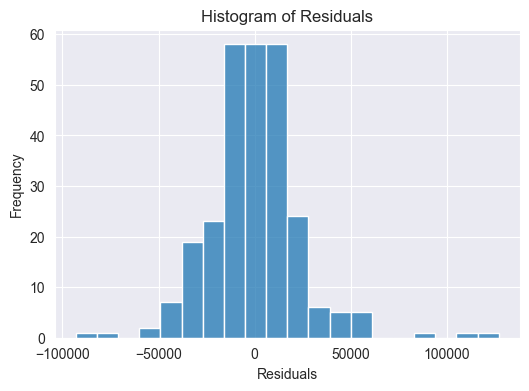

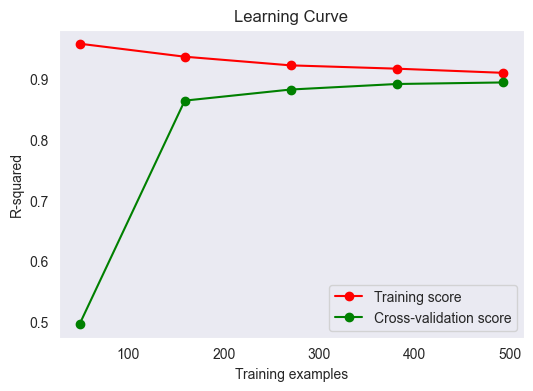

In [78]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(
    fit_intercept=True,   # Whether to calculate the intercept for this model
    n_jobs=None           # The number of jobs to use for the computation. -1 means using all processors
)

evaluate_model(model, X_train_transformed_df, y_train, X_test_transformed_df, y_test)

<br>

<b>5.3.2 RidgeRegression</b>

<br>

```Ridge regression``` is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated. It is chosen as a candidate model because it helps mitigate multicollinearity in the dataset, which is common in predicting house prices where features are correlated and multicollinearity is present among numerical variables as discussed in EDA. It introduces regularization to prevent overfitting by penalizing large coefficients. This ```RandomizedSearchCV``` optimizes Ridge's parameters such as ```alpha``` (regularization strength), ```tolerance```, ```maximum iterations```, and ```solver``` method to find the best fit for predicting house prices accurately.

Ridge Regression Formula:

\begin{equation}
\hat{\beta}^{\text{ridge}} = \arg \min_{\beta} \left\{ \sum_{i=1}^{N} \left( y_i - \beta_0 - \sum_{j=1}^{p} x_{ij} \beta_j \right)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 \right\}
\end{equation}




Recommended alpha  209.4326292893043
Recommended tol  0.10000389774292154
Recommended max_iter  21
Recommended solver  cholesky
RMSE Scores for each fold: [0.08523258 0.16201574 0.11494052 0.11946902 0.0987468  0.1280879
 0.09116801 0.11450541 0.14317979 0.16837404]
R-squared: 0.9044570464780416
Mean Squared Error: 0.01566842933729703


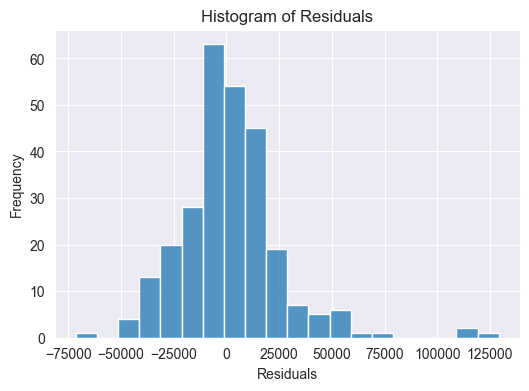

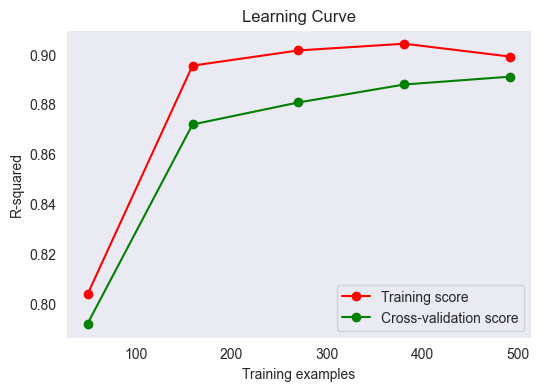

In [79]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import randint
from scipy.stats import uniform

#  Set up the RandomizedSearchCV with appropriate distributions and ranges and find
model = Ridge(random_state=seed)
param_grid = {
              'alpha': uniform(200,800),
              'tol':uniform(0.1,0.0001),
              'max_iter':randint(10,200),
              'solver':['auto', 'svd', 'cholesky','lsqr', 'sag'],
              }

rsearch = RandomizedSearchCV(estimator=model, 
                             param_distributions=param_grid, 
                             n_iter=100, 
                             cv=20,
                             random_state=seed)

rsearch.fit(X_train_transformed_df, y_train)

print("Recommended alpha ", rsearch.best_estimator_.alpha)
print("Recommended tol ", rsearch.best_estimator_.tol)
print("Recommended max_iter ", rsearch.best_estimator_.max_iter)
print("Recommended solver ", rsearch.best_estimator_.solver)

# Define Ridge model
model = Ridge(
    alpha=rsearch.best_estimator_.alpha,             # Regularization strength (higher values imply stronger regularization)
    fit_intercept=True,                              # Whether to calculate the intercept for this model
    max_iter=rsearch.best_estimator_.max_iter,       # Maximum number of iterations for optimization. None means until convergence.
    tol=rsearch.best_estimator_.tol,                 # Precision of the solution
    solver=rsearch.best_estimator_.solver,                                   # Algorithm to use in the optimization problem ('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga')
    random_state=seed,                                # Seed used by the random number generator
)

evaluate_model(model, X_train_transformed_df, y_train, X_test_transformed_df, y_test)

C:\Users\Claire\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Claire\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Claire\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-pac

Recommended max_depth: 9
Recommended min_samples_split: 4
Recommended min_samples_leaf: 6
Recommended max_features: None
RMSE Scores for each fold: [0.14262229 0.19597773 0.19795277 0.13776616 0.15453352 0.14925591
 0.16864965 0.17603335 0.17635943 0.21884663]
R-squared: 0.7876954955372829
Mean Squared Error: 0.034816572060433815


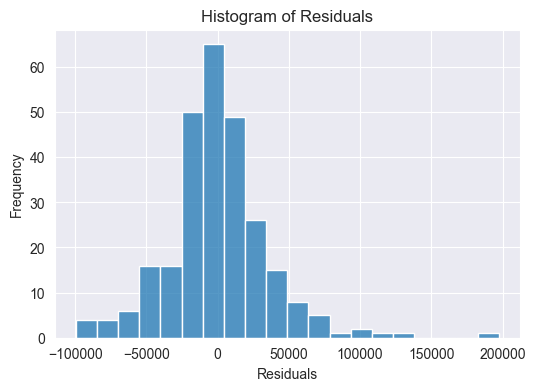

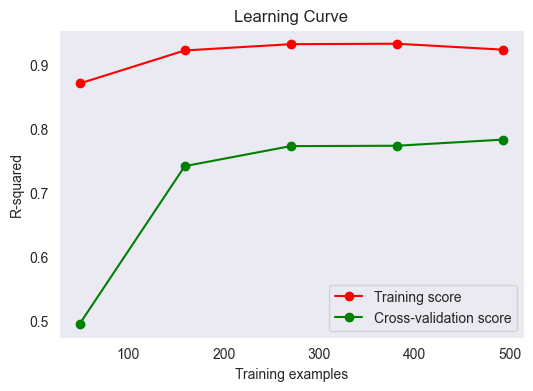

In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import mean_squared_error, r2_score

# Define the base Decision Tree model
model_dt = DecisionTreeRegressor(random_state=seed)

# Define the parameter grid for RandomizedSearchCV
param_grid_dt = {
    'max_depth': randint(1, 10),           # Maximum depth of the tree (uniform distribution between 1 and 10)
    'min_samples_split': randint(2, 20),    # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 10),     # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider when splitting
}

# Perform RandomizedSearchCV
rsearch_dt = RandomizedSearchCV(estimator=model_dt, 
                                param_distributions=param_grid_dt, 
                                n_iter=100,     # Number of parameter settings that are sampled
                                random_state=seed)

rsearch_dt.fit(X_train_transformed_df, y_train)

# Print the recommended hyperparameters
print("Recommended max_depth:", rsearch_dt.best_estimator_.max_depth)
print("Recommended min_samples_split:", rsearch_dt.best_estimator_.min_samples_split)
print("Recommended min_samples_leaf:", rsearch_dt.best_estimator_.min_samples_leaf)
print("Recommended max_features:", rsearch_dt.best_estimator_.max_features)

# Once you have the best parameters, define the model with those parameters
best_model_dt = DecisionTreeRegressor(
    max_depth=rsearch_dt.best_estimator_.max_depth,
    min_samples_split=rsearch_dt.best_estimator_.min_samples_split,
    min_samples_leaf=rsearch_dt.best_estimator_.min_samples_leaf,
    max_features=rsearch_dt.best_estimator_.max_features,
    random_state=seed
)

# Evaluate the best model
evaluate_model(best_model_dt, X_train_transformed_df, y_train, X_test_transformed_df, y_test)


<br>

<b>5.3.3 RandomForestRegression</b>

<br>

```RandomForestRegression``` is an ensemble learning method used for regression tasks. It combines multiple decision trees to improve predictive accuracy and control overfitting. ```Random Forest Regression``` is particularly useful for predicting house prices due to its ability to handle a large number of features and capture complex interactions between them. By averaging the predictions from numerous decision trees, it reduces variance and improves generalization.

Random Forest Regression Formula:

\begin{equation}
\hat{y} = \frac{1}{T} \sum_{t=1}^{T} \hat{y}^{(t)}
\end{equation}

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Recommended n_estimators: 91
Recommended max_depth: 4
Recommended max_features: log2
Recommended min_samples_split: 15
Recommended min_samples_leaf: 12
Recommended bootstrap: True
RMSE Scores for each fold: [0.17285798 0.16607337 0.19109507 0.23428776 0.14444324 0.17447147
 0.16498022 0.18800778 0.16653951 0.15135446]
R-squared: 0.7934079113353381
Mean Squared Error: 0.035973970113889184


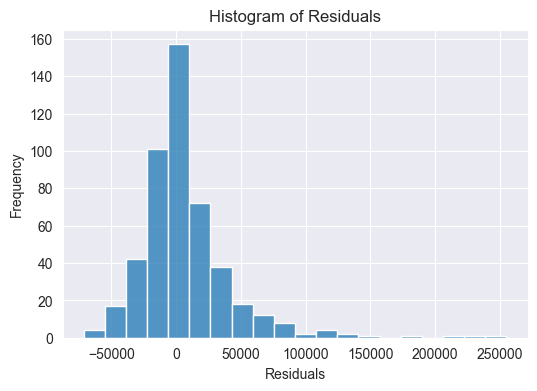

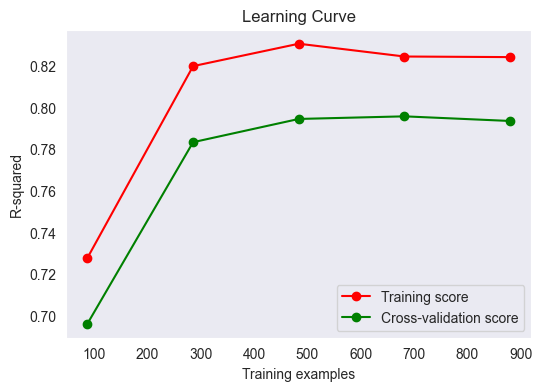

In [44]:
from sklearn.ensemble import RandomForestRegressor

# Define the base Random Forest model
model = RandomForestRegressor(random_state=seed)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': randint(50, 100),      # Number of trees in the forest (uniform distribution between 0 and 500)
    'max_depth': randint(1, 5),          # Maximum depth of the trees (uniform distribution between 0 and 500)
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'min_samples_split': randint(10, 20),   # Minimum number of samples required to split an internal node (uniform distribution between 2 and 20)
    'min_samples_leaf': randint(10, 20),    # Minimum number of samples required to be at a leaf node (uniform distribution between 1 and 10)
}

# Perform RandomizedSearchCV
rsearch = RandomizedSearchCV(estimator=model,
                                       param_distributions=param_grid,
                                       n_iter=100,
                                       cv=10,
                                       scoring='neg_mean_squared_error',
                                       verbose=1,
                                       n_jobs=-1)

rsearch.fit(X_train_transformed_df, y_train)

# Print the recommended hyperparameters
print("Recommended n_estimators:", rsearch.best_estimator_.n_estimators)
print("Recommended max_depth:", rsearch.best_estimator_.max_depth)
print("Recommended max_features:", rsearch.best_estimator_.max_features)
print("Recommended min_samples_split:", rsearch.best_estimator_.min_samples_split)
print("Recommended min_samples_leaf:", rsearch.best_estimator_.min_samples_leaf)
print("Recommended bootstrap:", rsearch.best_estimator_.bootstrap)

# Once you have the best parameters, define the model with those parameters
best_model = RandomForestRegressor(
    n_estimators=rsearch.best_estimator_.n_estimators,
    max_depth=rsearch.best_estimator_.max_depth,
    max_features=rsearch.best_estimator_.max_features,
    min_samples_split=rsearch.best_estimator_.min_samples_split,
    min_samples_leaf=rsearch.best_estimator_.min_samples_leaf,
    bootstrap=True,
    random_state=seed
)

# Evaluate the best model
evaluate_model(best_model, X_train_transformed_df, y_train, X_test_transformed_df, y_test)


<br>

<b>5.3.4 KNeighborsRegressor</b>

<br>

```K-Nearest Neighbors (KNN) Regression``` is a non-parametric method used for regression tasks. It predicts the target value for a given input by averaging the target values of its nearest neighbors. KNN is particularly useful for house price prediction as it can capture local trends and patterns in the data without making strong assumptions about the underlying distribution.

K-Nearest Neighbors Regression Formula:

\begin{equation}
\hat{y} = \frac{1}{k} \sum_{i=1}^{k} y_i
\end{equation}

<br>

<b>5.3.5 Elastic Net</b>

<br>

Fitting 7 folds for each of 8748 candidates, totalling 61236 fits
Best parameters found by GridSearchCV:
{'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_samples': 30, 'n_estimators': 150, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.6}
RMSE Scores for each fold: [0.10133301 0.17115056 0.13805147 0.11040934 0.10013853 0.11473297
 0.11142322 0.136059   0.14561184 0.19447574]
R-squared: 0.8955424446873229
Mean Squared Error: 0.017130366644854875


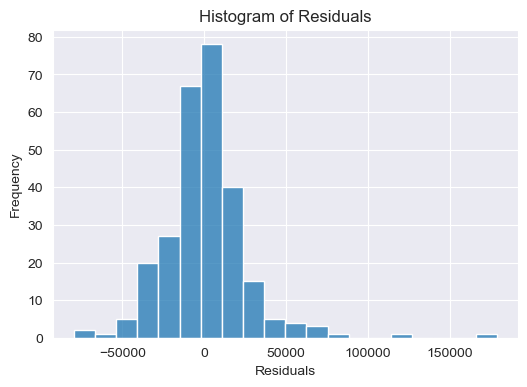

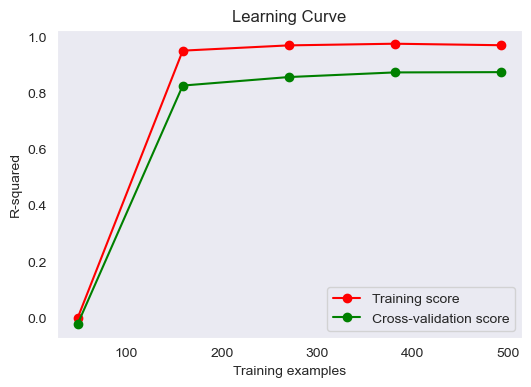

In [313]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.2,0.5],     # Adjust learning_rate based on findings
    'n_estimators': [100, 150, 200, 250],       # Adjust n_estimators based on findings
    'max_depth': [5, 6, 7],                     # Adjust max_depth based on findings
    'subsample': [0.6, 0.7, 0.8],               # Adjust subsample based on findings
    'colsample_bytree': [0.6, 0.7, 0.8],        # Adjust colsample_bytree based on findings
    'reg_alpha': [0.1, 0.5, 1.0],               # Adjust reg_alpha based on findings
    'reg_lambda': [0.1, 0.5, 1.0],              # Adjust reg_lambda based on findings
    'min_child_samples': [20, 25, 30]           # Adjust min_child_samples based on findings
}

# Perform GridSearchCV
gsearch = GridSearchCV(estimator=model, 
                       param_grid=param_grid, 
                       cv=5,             # Number of cross-validation folds
                       scoring='neg_mean_squared_error',  # Evaluation metric
                       verbose=1,        # Output progress
                       n_jobs=-1)        # Use all available CPUs

gsearch.fit(X_train_transformed_df, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:")
print(gsearch.best_params_)

# Define LightGBM model with the best parameters
best_model = lgb.LGBMRegressor(**gsearch.best_params_, random_state=seed)

# Evaluate the best model on the test set
evaluate_model(best_model, X_train_transformed_df, y_train, X_test_transformed_df, y_test)


In [81]:
from sklearn.model_selection import GridSearchCV
import catboost as cb

# Define the parameter grid for GridSearchCV for CatBoost
param_grid_cb = {
    'learning_rate': [0.1, 0.2, 0.5],         # Adjust learning_rate based on findings
    'n_estimators': [100, 150, 200, 250],     # Adjust n_estimators based on findings
    'max_depth': [5, 6, 7],                   # Adjust max_depth based on findings
    'subsample': [0.6, 0.7, 0.8],             # Adjust subsample based on findings
    'colsample_bylevel': [0.6, 0.7, 0.8],     # Adjust colsample_bylevel based on findings
    'reg_lambda': [0.1, 0.5, 1.0],            # Adjust reg_lambda based on findings
    'min_data_in_leaf': [20, 25, 30]          # Adjust min_data_in_leaf based on findings
}

# Create the CatBoostRegressor model
cb_model = cb.CatBoostRegressor(verbose=0, random_seed=seed)

# Perform GridSearchCV for CatBoost
gsearch_cb = GridSearchCV(estimator=cb_model, 
                          param_grid=param_grid_cb, 
                          cv=5,             # Number of cross-validation folds
                          scoring='neg_mean_squared_error',  # Evaluation metric
                          verbose=1,        # Output progress
                          n_jobs=-1)        # Use all available CPUs

gsearch_cb.fit(X_train_transformed_df, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV for CatBoost:")
print(gsearch_cb.best_params_)

# Define CatBoost model with the best parameters
best_cb_model = cb.CatBoostRegressor(**gsearch_cb.best_params_, random_seed=seed, verbose=0)

# Evaluate the best CatBoost model on the test set
evaluate_model(best_cb_model, X_train_transformed_df, y_train, X_test_transformed_df, y_test)


Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


KeyboardInterrupt: 

<br>

<b>5.3.6 NeuralNetwork</b>

<br>

8/8 [==============================] - 0s 3ms/step - loss: 0.0544 - mean_squared_error: 0.0201
mean_squared_error 0.02005179040133953


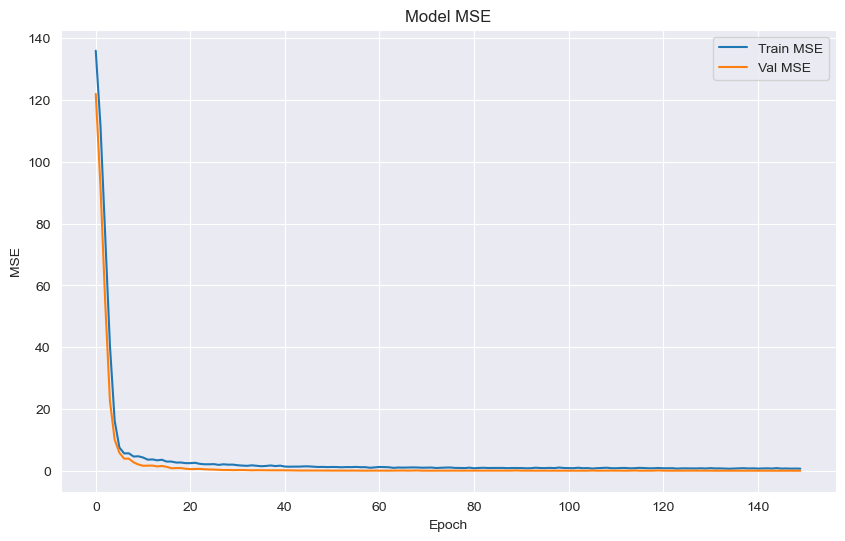

In [39]:
import os
# Set environment variable to force pure-Python protobuf implementation
os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"] = "python"
os.environ["SM_FRAMEWORK"] = "tf.keras"
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, input_dim=X_train_transformed_df.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
optimizer = Adam(learning_rate=0.001)
# Compile model
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error']) 

history=model.fit(X_train_transformed_df, y_train,validation_data=(X_test_transformed_df,y_test), epochs=150,batch_size=5,verbose = 0)

scores = model.evaluate(X_test_transformed_df, y_test)

print(model.metrics_names[1], scores[1])

# Plot training & validation MSE values
plt.figure(figsize=(10, 6))
plt.plot(history.history['mean_squared_error'], label='Train MSE')
plt.plot(history.history['val_mean_squared_error'], label='Val MSE')
plt.title('Model MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

<br>

<b>5.3.7 VotingRegressor</b>

<br>
Voting combines predictions from multiple models to improve accuracy. It creates standalone models from training data and averages their predictions. This ensemble approach enhances performance on new data.
```VotingRegressor``` here is used to evaluate how well the ensemble of ```LinearRegression```, ```Ridge```, and ```RandomForestRegressor``` models performs on the combined dataset (X, y) using ```cross-validation```. The ```results.mean()``` gives an average R-squared score across all folds, indicating the overall performance of the ensemble model.

In [40]:
from sklearn.ensemble import VotingRegressor

estimators = []
model1 = LinearRegression(
    fit_intercept=True,  
    n_jobs=None          
)

model2 = Ridge(
    alpha=9.666548190436696,             
    fit_intercept=True,                             
    max_iter=108,       
    tol=0.010000075346256007,                 
    solver='auto',                                  
    random_state=seed                              
)

model3 = SVR(
    C=4.9059528191195705,
    epsilon=0.03066843598767454,
    kernel='linear',
    degree=3,
    gamma='scale'
)

estimators.append(('LinearRegression', model1))
estimators.append(('Ridge', model2))
estimators.append(('SVR', model3))

ensemble = VotingRegressor(estimators)

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

results = cross_val_score(ensemble, X, y, cv=kfold)

print('average of MSE: ', results.mean())

NameError: name 'SVR' is not defined

Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer, StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer

# Custom transformer to remove outliers (dummy implementation)
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X  # Placeholder, replace with actual logic


# Custom transformer to handle missing values (dummy implementation)
class MissingValueHandler(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Implement missing value handling logic here
        return X  # Placeholder, replace with actual logic


# Custom transformer for categorical encoding (dummy implementation)
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Implement categorical encoding logic here
        return X  # Placeholder, replace with actual logic


# Custom transformer for logarithmic transformation
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return np.log(X)  # Logarithmic transformation

class TrainTestSplit(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return x  # Logarithmic transformation

# Define preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('outlier_removal', OutlierRemover()),
    ('missing_value_handler', MissingValueHandler()),
    ('categorical_encoder', CategoricalEncoder()),
])

# Define feature engineering pipeline
feature_engineering_pipeline = Pipeline([
    ('train_test_split', TrainTestSplit()),
    ('log_transform', LogTransformer()),
    ('filter', VarianceThreshold(threshold=0.95)),
    ('wrapper', RFE(estimator=RandomForestRegressor(random_state=7), n_features_to_select=5)),
    ('scaler', StandardScaler()),
    ('power_transform', PowerTransformer(method='yeo-johnson'))
])

# Define modeling pipeline
modeling_pipeline = Pipeline([
    ('model', LinearRegression())
])

# Combine preprocessing, feature engineering, and modeling pipelines
main_pipeline = Pipeline([
    ('Preprocessing', preprocessing_pipeline),
    ('Feature_engineering', feature_engineering_pipeline),
    ('Modeling', modeling_pipeline)
])

main_pipeline
